In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


In [2]:
raw_path: str = "../../data/raw"
processed_path: str = "../../data/processed"
submission_path: str = "../../data/submission"

df: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"V2_features.csv"))
df2: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"recent_deposit_for_arima2.csv"))

In [3]:
df

,apt_idx,index,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,...,nearest_high_school_within_1km,has_high_school_within_1km,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,interest_rate,diff_interest_rate
0,0,0,84.9981,2,9,2019,37.054314,127.045216,0,17000.0,...,1,True,717,40,1,1,0,0,1.85,-0.09
1,0,1,84.9981,2,20,2019,37.054314,127.045216,1,23000.0,...,1,True,717,40,1,1,0,0,1.85,-0.09
2,0,2,84.9981,2,8,2019,37.054314,127.045216,1,23000.0,...,1,True,717,40,1,1,0,0,1.85,-0.09
3,1,3,59.3400,2,1,1986,36.964647,127.055847,33,5000.0,...,1,True,3897,41,0,0,0,0,1.85,-0.09
4,2,4,59.8100,2,6,1995,36.972390,127.084514,24,1800.0,...,0,False,2039,41,0,0,0,0,1.85,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,17869,150167,115.5101,0,17,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00
1951396,17869,150168,142.8738,0,4,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00
1951397,17869,150169,142.8738,1,13,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00
1951398,17869,150170,114.9285,1,2,2010,37.528394,126.659398,14,NaN,...,2,True,1483,650,0,0,0,0,3.56,0.00


In [4]:
df2

,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,...,index,apt_idx,area,area_price,area_m2_price,contract_ymd,apt_area_idx,apt_area_deposit_criteria,recent_deposit,recent_contract_ymd
0,71.3755,202002,8,2,18,2019,37.054314,127.045216,1,20000.0,...,NaN,0,21.6,925.925926,280.208195,2020-02-08,0,29283.096774,NaN,NaN
1,71.3755,202007,8,2,8,2019,37.054314,127.045216,1,26000.0,...,NaN,0,21.6,1203.703704,364.270653,2020-07-08,0,29283.096774,20000.0,2020-02-08
2,71.3755,202007,16,2,20,2019,37.054314,127.045216,1,31500.0,...,NaN,0,21.6,1458.333333,441.327907,2020-07-16,0,29283.096774,26000.0,2020-07-08
3,71.3755,202011,2,2,2,2019,37.054314,127.045216,1,40000.0,...,NaN,0,21.6,1851.851852,560.416389,2020-11-02,0,29283.096774,31500.0,2020-07-16
4,71.3755,202012,13,2,25,2019,37.054314,127.045216,1,35000.0,...,NaN,0,21.6,1620.370370,490.364341,2020-12-13,0,29283.096774,40000.0,2020-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,64.1000,202401,23,0,10,2015,37.499548,127.144838,9,NaN,...,139727.0,18672,19.4,NaN,NaN,2024-01-23,59561,NaN,NaN,NaN
1951396,75.6200,202401,16,0,3,2004,37.463234,126.642899,20,NaN,...,142914.0,18673,22.9,NaN,NaN,2024-01-16,59562,NaN,NaN,NaN
1951397,75.6200,202401,16,0,3,2004,37.463234,126.642899,20,NaN,...,142915.0,18673,22.9,NaN,NaN,2024-01-16,59562,NaN,NaN,NaN
1951398,49.9000,202403,25,0,13,2015,37.459061,126.674991,9,NaN,...,143189.0,18674,15.1,NaN,NaN,2024-03-25,59563,NaN,NaN,NaN


In [3]:
# df의 recent_deposit 열을 삭제
df = df.drop(columns=['recent_deposit'], errors='ignore')

# df2에서 필요한 열만 추출
df2_subset = df2[['_type', 'original_index', 'recent_deposit']]

# df와 df2를 _type과 index를 기준으로 병합
df = df.merge(df2_subset, how='left', left_on=['_type', 'index'], right_on=['_type', 'original_index'])

# 결과 확인
df

,apt_idx,index,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,...,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,interest_rate,diff_interest_rate,original_index,recent_deposit
0,0,0,84.9981,2,9,2019,37.054314,127.045216,0,17000.0,...,717,40,1,1,0,0,1.85,-0.09,0,NaN
1,0,1,84.9981,2,20,2019,37.054314,127.045216,1,23000.0,...,717,40,1,1,0,0,1.85,-0.09,1,17000.0
2,0,2,84.9981,2,8,2019,37.054314,127.045216,1,23000.0,...,717,40,1,1,0,0,1.85,-0.09,2,23000.0
3,1,3,59.3400,2,1,1986,36.964647,127.055847,33,5000.0,...,3897,41,0,0,0,0,1.85,-0.09,3,NaN
4,2,4,59.8100,2,6,1995,36.972390,127.084514,24,1800.0,...,2039,41,0,0,0,0,1.85,-0.09,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,17869,150167,115.5101,0,17,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150167,37000.0
1951396,17869,150168,142.8738,0,4,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150168,43000.0
1951397,17869,150169,142.8738,1,13,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150169,43000.0
1951398,17869,150170,114.9285,1,2,2010,37.528394,126.659398,14,NaN,...,1483,650,0,0,0,0,3.56,0.00,150170,32500.0


In [6]:
pd.set_option('display.max_columns', None)
df[df['apt_idx']==15571]

,apt_idx,index,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,area_m2_price,contract_ymd,grid_id,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,nearest_elementary_school_distance,nearest_elementary_school_within_1km,has_elementary_school_within_1km,nearest_middle_school_distance,nearest_middle_school_within_1km,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,interest_rate,diff_interest_rate,original_index,recent_deposit
1260709,15571,1260709,273.96,0,14,2020,37.525956,127.054237,1,930000.0,train,3394.656154,2022-09-26,91115.932685,477.939202,1,True,841.746119,2,True,883.965127,1,True,947.066814,2,True,737,367,1,1,0,0,3.40,0.44,1260709,NaN
1406833,15571,1406833,273.96,0,18,2020,37.525956,127.054237,2,1100000.0,train,4015.184698,2023-02-08,91115.932685,477.939202,1,True,841.746119,2,True,883.965127,1,True,947.066814,2,True,737,367,1,1,0,0,3.53,-0.29,1406833,930000.0
1539384,15571,1539384,273.96,1,2,2020,37.525956,127.054237,3,570000.0,train,2080.595707,2023-05-16,91115.932685,477.939202,1,True,841.746119,2,True,883.965127,1,True,947.066814,2,True,737,367,1,1,0,0,3.56,0.12,1539384,1100000.0
1542638,15571,1542638,273.96,2,14,2020,37.525956,127.054237,3,1000000.0,train,3650.167908,2023-05-19,91115.932685,477.939202,1,True,841.746119,2,True,883.965127,1,True,947.066814,2,True,737,367,1,1,0,0,3.56,0.12,1542638,570000.0


In [4]:
from src.pre_process.feature_deposit_ranking import FeatureAptDepositRanking
df = FeatureAptDepositRanking(df).get_data()

In [5]:
df.columns

Index(['apt_idx', 'index', 'area_m2', 'contract_type', 'floor', 'built_year',
       'latitude', 'longitude', 'age', 'deposit', '_type', 'area_m2_price',
       'contract_ymd', 'grid_id', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_subway_distance',
       'nearest_subway_idx', 'num_subway_within_1km',
       'category_interchange_within_1km', 'num_subway_within_500m',
       'category_interchange_within_500m', 'interest_rate',
       'diff_interest_rate', 'original_index', 'recent_deposit',
       'apt_deposit_rank', 'apt_area_deposit_rank'],
      dtype='object')

In [6]:
df.isna().sum()

apt_idx                                      0
index                                        0
area_m2                                      0
contract_type                                0
floor                                        0
built_year                                   0
latitude                                     0
longitude                                    0
age                                          0
deposit                                 150172
_type                                        0
area_m2_price                           150172
contract_ymd                                 0
grid_id                                      0
nearest_park_distance                        0
nearest_park_within_500.0m                   0
has_park_within_500.0m                       0
nearest_elementary_school_distance           0
nearest_elementary_school_within_1km         0
has_elementary_school_within_1km             0
nearest_middle_school_distance               0
nearest_middl

In [7]:
columns_to_drop = ['area_m2_price', 'year_month', 'contract_ymd', 'original_index']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Convert boolean columns to integer columns
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

temp_train_df = df[df["_type"]=='train']
test_df = df[df["_type"]=='test']

In [8]:
test_df

,apt_idx,index,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,...,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,interest_rate,diff_interest_rate,recent_deposit,apt_deposit_rank,apt_area_deposit_rank
1801228,3,0,84.9610,1,14,2016,36.965423,127.048779,8,NaN,...,41,0,0,0,0,3.66,-0.18,22000.0,11986,43736
1801229,5,1,59.9000,0,4,1997,36.963105,127.040678,27,NaN,...,41,0,0,0,0,3.66,-0.18,7900.0,18164,58231
1801230,4,2,39.2700,0,5,1990,36.957089,127.047449,34,NaN,...,41,0,0,0,0,3.66,-0.18,6300.0,18382,59031
1801231,4,3,39.2700,0,1,1990,36.957089,127.047449,34,NaN,...,41,0,0,0,0,3.66,-0.18,6300.0,18382,59031
1801232,4,4,46.9800,0,4,1990,36.957089,127.047449,34,NaN,...,41,0,0,0,0,3.66,-0.18,5500.0,18382,58861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,17869,150167,115.5101,0,17,2010,37.528394,126.659398,14,NaN,...,650,0,0,0,0,3.56,0.00,37000.0,6088,25360
1951396,17869,150168,142.8738,0,4,2010,37.528394,126.659398,14,NaN,...,650,0,0,0,0,3.56,0.00,43000.0,6088,17911
1951397,17869,150169,142.8738,1,13,2010,37.528394,126.659398,14,NaN,...,650,0,0,0,0,3.56,0.00,43000.0,6088,17911
1951398,17869,150170,114.9285,1,2,2010,37.528394,126.659398,14,NaN,...,650,0,0,0,0,3.56,0.00,32500.0,6088,24128


In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# 학습에 사용할 특징 열
feature_columns = [col for col in temp_train_df.columns if col not in ['deposit', '_type', 'index']]

# 학습 및 테스트 데이터 준비
X_train = temp_train_df[feature_columns]
y_train = temp_train_df['deposit']
X_test = test_df[feature_columns]


# 학습 데이터를 검증용으로 분할
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# XGBoost를 위한 DMatrix 생성
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)
dtest = xgb.DMatrix(X_test)

# XGBoost 파라미터 설정
params = {
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 모델 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=100, early_stopping_rounds=50, evals=evals, verbose_eval=10)

# 테스트 세트에 대한 예측
y_pred = model.predict(dtest)

[0]	train-mae:16518.47527	eval-mae:16519.73606
[10]	train-mae:11287.51128	eval-mae:11288.23424
[20]	train-mae:8188.15540	eval-mae:8184.70241
[30]	train-mae:6413.75474	eval-mae:6403.88813
[40]	train-mae:5482.73617	eval-mae:5469.53794
[50]	train-mae:5011.32446	eval-mae:4998.35677
[60]	train-mae:4771.48949	eval-mae:4759.49416
[70]	train-mae:4640.27874	eval-mae:4630.61256
[80]	train-mae:4573.85622	eval-mae:4565.71983
[90]	train-mae:4537.39650	eval-mae:4530.45699
[100]	train-mae:4511.72606	eval-mae:4505.74200
[110]	train-mae:4489.79819	eval-mae:4484.60925
[120]	train-mae:4471.87399	eval-mae:4467.54334
[130]	train-mae:4451.85592	eval-mae:4448.21643
[140]	train-mae:4433.37449	eval-mae:4430.46677
[150]	train-mae:4411.35381	eval-mae:4409.04965
[160]	train-mae:4389.75685	eval-mae:4388.53069
[170]	train-mae:4375.89049	eval-mae:4375.31428
[180]	train-mae:4363.06150	eval-mae:4363.33524
[190]	train-mae:4351.33130	eval-mae:4352.41522
[200]	train-mae:4341.22934	eval-mae:4342.71723
[210]	train-mae:4330

ValueError: Input contains NaN.

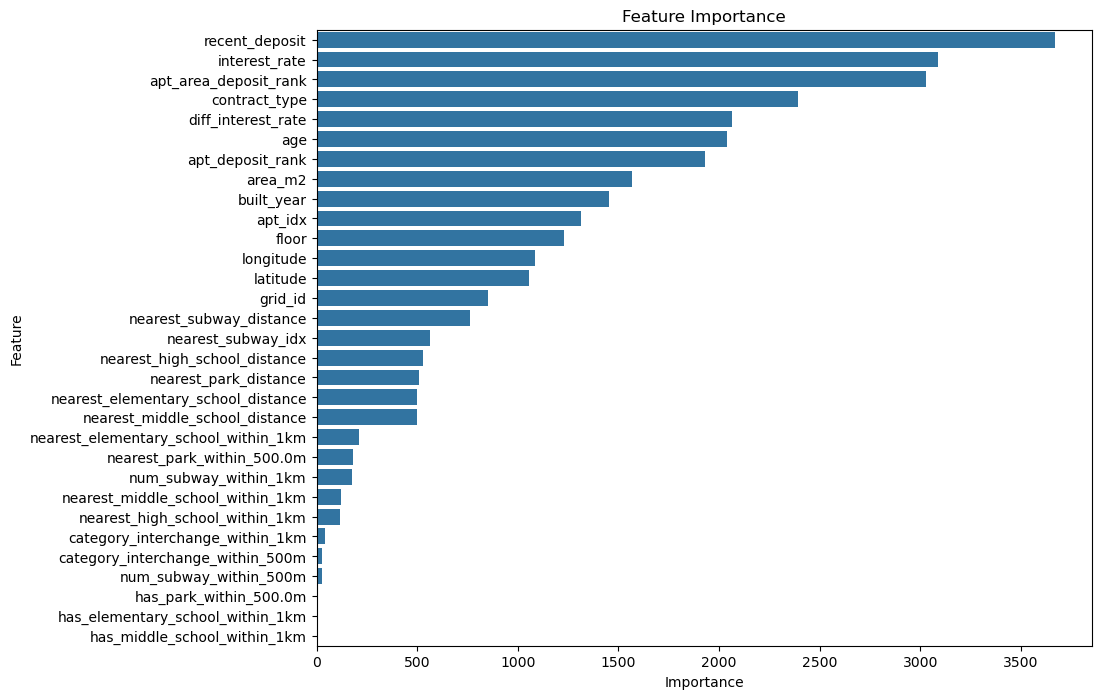

In [10]:
# 피처 중요도 추출
feature_importance = model.get_fscore()

# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [11]:
y_pred

array([19067.77  ,  6178.9795,  5562.672 , ..., 42092.055 , 34461.082 ,
       35944.05  ], dtype=float32)

In [12]:
# Create a DataFrame from y_pred with the same index as X_test
y_pred_df = pd.DataFrame(y_pred, index=range(len(y_pred)), columns=['deposit'])

# Display the DataFrame
y_pred_df

,deposit
0,19067.769531
1,6178.979492
2,5562.671875
3,5803.814941
4,5811.662109
...,...
150167,37481.777344
150168,43390.781250
150169,42092.054688
150170,34461.082031


In [13]:
y_pred_df.index.name = 'index'
y_pred_df

,deposit
index,
0,19067.769531
1,6178.979492
2,5562.671875
3,5803.814941
4,5811.662109
...,...
150167,37481.777344
150168,43390.781250
150169,42092.054688


In [14]:
submission_path: str = "../../data/submission"
y_pred_df.to_csv(os.path.join(submission_path, "xgboost_6.csv"), index=True)

In [20]:
# Read the output.csv file from the submission_path
output_df = pd.read_csv(os.path.join(submission_path, "output.csv"))

# Calculate the mean of the 'deposit' column
mean_deposit = output_df['deposit'].mean()

# Print the mean deposit
print(f"Mean deposit: {mean_deposit}")

Mean deposit: 39396.78549459324


In [13]:
mean_y_pred_deposit = y_pred_df['deposit'].mean()
print(f"Mean deposit in y_pred_df: {mean_y_pred_deposit}")

Mean deposit in y_pred_df: 37287.578125


In [14]:
from sklearn.metrics import mean_absolute_error

# 두 값의 차이 계산
mae_difference = mean_absolute_error([mean_deposit], [mean_y_pred_deposit])
print(f"MAE Difference: {mae_difference}")

MAE Difference: 2109.2073695932413
